<a href="https://colab.research.google.com/github/sivalankapranay/deeplearning/blob/main/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5007 - loss: 402.5067 - val_accuracy: 0.4957 - val_loss: 3.0951
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5017 - loss: 21.1117 - val_accuracy: 0.4996 - val_loss: 0.7245
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5036 - loss: 3.6325 - val_accuracy: 0.4996 - val_loss: 0.7078
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5082 - loss: 2.0512 - val_accuracy: 0.5026 - val_loss: 0.6968
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5019 - loss: 1.3519 - val_accuracy: 0.4983 - val_loss: 0.6958
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4949 - loss: 1.0877 - val_accuracy: 0.4992 - val_loss: 0.6962
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5006 - loss: 1.0987 - val_accuracy: 0.4994 - val_loss: 0.6938
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

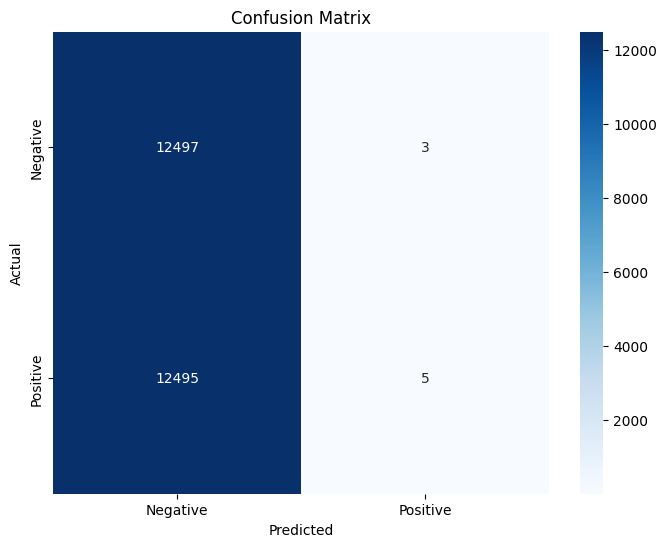

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()